# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
from google.colab import files
src = list(files.upload().values())[0]
open('customers.csv','wb').write(src)

Saving customers.csv to customers (5).csv


In [0]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

warnings.simplefilter("ignore", category=PendingDeprecationWarning)


In [3]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [4]:
# Display a description of the dataset
print(type(data))
display(data.describe())

<class 'pandas.core.frame.DataFrame'>


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,31276,1917,4469,9408,2381,4334
1,22647,9776,13792,2915,4482,5778
2,2787,1698,2510,65,477,52


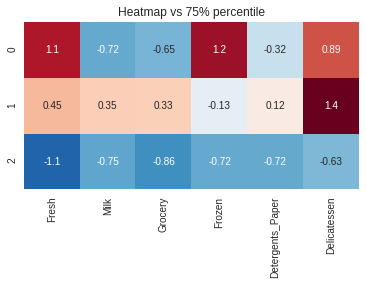

In [5]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [22, 24, 439]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

#use 75% percentile as a reference index
plt.axes().set_title("Heatmap vs 75% percentile")
sns.heatmap((samples-data.quantile(q=0.75))/data.std(ddof=0), annot=True, cbar=False, square=True)

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

1.   Index 22 may be a **restaurant,** as there is a high consumption in fresh, frozen, and delicatssen. 
2.   Index 24 may be a **superarket**, as there is a generally larger consumption in all categories. 
3.   Index 439 may be an **independent establishment** that sells other things besides eateries (or is doing really poorly), judging from its low consumption of all categories.



### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [6]:
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

"""
Decision tree --> accuracy increase with more splits, but may overfit data
Random Forest --> Blackbox, cannot control randomness, reduces variance, likely not high in variance
"""

for drop_index in data.columns:
  # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
  #drop_index = 'Delicatessen'
  new_data = data.drop([drop_index], axis=1)

  # TODO: Split the data into training and testing sets using the given feature as the target
  #r = rest, t = target
  X_train, X_test, y_train, y_test = train_test_split(new_data, data[drop_index], test_size = 0.25, random_state = 42)

  # TODO: Create a decision tree regressor and fit it to the training set
  regr = RandomForestRegressor(random_state = 42)
  regr.fit(X_train, y_train)

  # TODO: Report the score of the prediction using the testing set
  y_test_pred=regr.predict(X_test)
  score = r2_score(y_test, y_test_pred)

  print ("{} : prediction score R^2 on the test dataset is {}".format(drop_index, score))

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Fresh : prediction score R^2 on the test dataset is 0.165342799988
Milk : prediction score R^2 on the test dataset is 0.634034505746
Grocery : prediction score R^2 on the test dataset is 0.720886364278
Frozen : prediction score R^2 on the test dataset is 0.0307983804799
Detergents_Paper : prediction score R^2 on the test dataset is 0.622598252862
Delicatessen : prediction score R^2 on the test dataset is -0.825101468698


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

|     Target    | R<sup>2</sup> value | 
| :------------: | :-----------------: |
| Fresh                  |    0.1653                  |
| Milk             |     0.6340                        |
| Grocery               |     0.7209                   |
|Frozen      |     0.0308                         |
| Detergents_Paper           |     0.6226                   |
| Delicatessen      |     -0.8251                   |


I attempted to predict the feature **Delicatessen**, and the prediction score reported was **-5.846**. The negative R^2 value indicates that there is absolutely no correlation between 'Delicatessen' and other features. (Targetting for Delicatessen fits worse than a horizontal line). Therefore, 'Delicatessen' is absolutely necessary in the data. 

Further, the features **grocery, milk, and detergents_paper ** (in that order) are most dependent features, and can be selected as an omissible feature. 

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


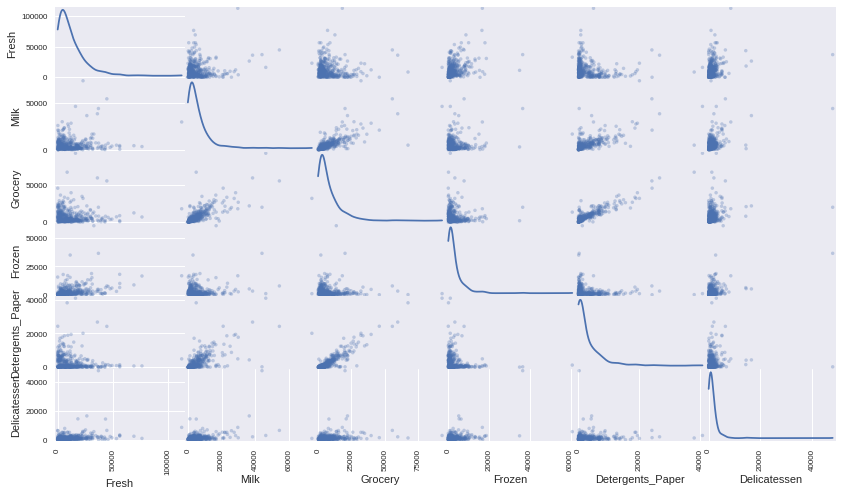

In [7]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');


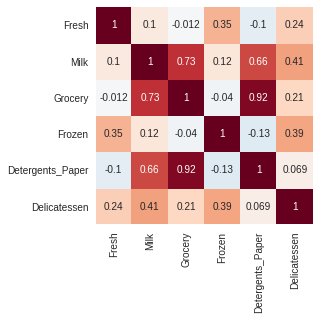

In [8]:
corr = data.corr()
sns.heatmap(corr, 
            annot=True, 
            cbar=False, 
            square=True)

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

|     Target    | R<sup>2</sup> value | 
| :------------: | :-----------------: |
| Fresh                  |    0.1653                  |
| Milk             |     0.6340                        |
| Grocery               |     0.7209                   |
|Frozen      |     0.0308                         |
| Detergents_Paper           |     0.6226                   |
| Delicatessen      |     -0.8251                   |


My initial assumption was that grocery, milk, and detergents_paper have high correlation with the rest of the data, and that delicatessen is very independent from th rest of the data. 

According to the correlation graphs, grocery&detergents_paper, milk & grocery, and milk & detergents paper have very high correlation with one another. This is in synchronization with my initial hypothesis. 
All of the data seem to be heavily skewed to the right, meaning that there are only some outliers with very high values. This indicates some need for pruning outliers, and rescaling of the data, perhaps via log. 

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  import sys


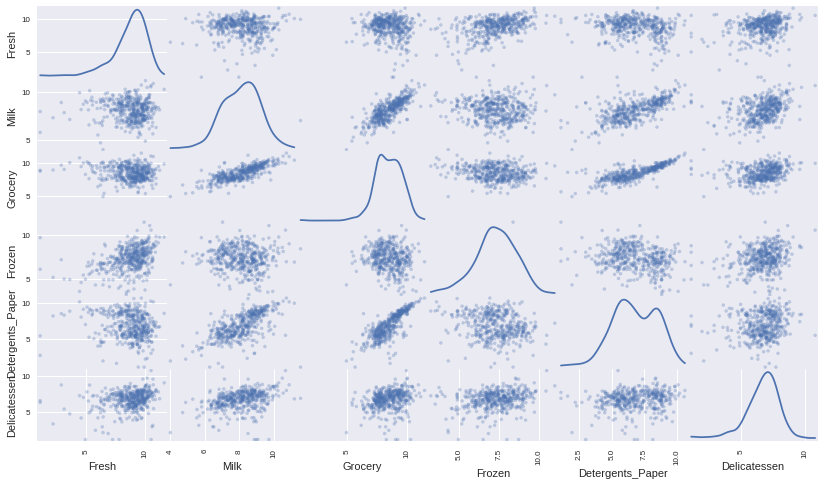

In [9]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [10]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,10.350606,7.558517,8.404920,9.149316,7.775276,8.374246
1,10.027783,9.187686,9.531844,7.977625,8.407825,8.661813
2,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [11]:
from collections import Counter

out_list=[]
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1)*1.5
    
    # Display the outliers; "beyond" an outlier step
    print "Data points considered outliers for the feature '{}':".format(feature)
    outlier = np.where((log_data[feature]<Q1-step) | (log_data[feature]>Q3+step))[0]
    print(outlier)    
    display(log_data.iloc[outlier])
    out_list.extend(outlier)
    #Store outliers in a list
    #out_list.extend(np.array(outlier))
    
dupe = set([x for x in out_list if out_list.count(x)>1])
print('Duplicates are {}'.format(dupe)) 
out_list = list(set(out_list))

# OPTIONAL: Select the indices for data points you wish to remove
# Remove the outliers, if any were specified

#good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
good_data = log_data.drop(out_list).reset_index(drop=True)
#good_data = log_data.drop(out_list).reset_index(drop=True)
print("Removed {} outliers. New dataset has {} samples with {} features".format(len(out_list), len(good_data), len(good_data.columns)))
print(out_list)

Data points considered outliers for the feature 'Fresh':
[ 65  66  81  95  96 128 171 193 218 304 305 338 353 355 357 412]


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':
[ 86  98 154 356]


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':
[ 75 154]


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':
[ 38  57  65 145 175 264 325 420 429 439]


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':
[ 75 161]


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':
[ 66 109 128 137 142 154 183 184 187 203 233 285 289 343]


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


Duplicates are set([128, 65, 66, 75, 154])
Removed 42 outliers. New dataset has 398 samples with 6 features
[128, 193, 264, 137, 142, 145, 154, 412, 285, 161, 420, 38, 171, 429, 175, 304, 305, 439, 184, 57, 187, 65, 66, 203, 325, 289, 75, 81, 338, 86, 343, 218, 95, 96, 353, 98, 355, 356, 357, 233, 109, 183]


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 


**Answer:**
Some duplicate outliers were : 

*   index 65: Fresh, Frozen
*   index 66: Fresh, Delicatessen
*   index 75: Grocery, Detergents_Paper
*   index 128: Fresh, Delicatessen
*   index 154: Milk, Grocery, Delicatessen

These subset of indices which were outliers for multiple features should definitely be removed. The rest of the outliers should be considered for omission, but they do represent 42/440=9.55% of the entire data after omission. If we were to only omit the duplicate outliers, we would be removing 11/440=2.5% of the entire data after omission.


## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

Original shape (3, 6) decreased to (3, 6)
The cumulative explained variance is equal to:
Dimension 1    0.4993
Dimension 2    0.7252
Dimension 3    0.8301
Dimension 4    0.9279
Dimension 5    0.9767
Dimension 6    1.0000
Name: Explained Variance, dtype: float64



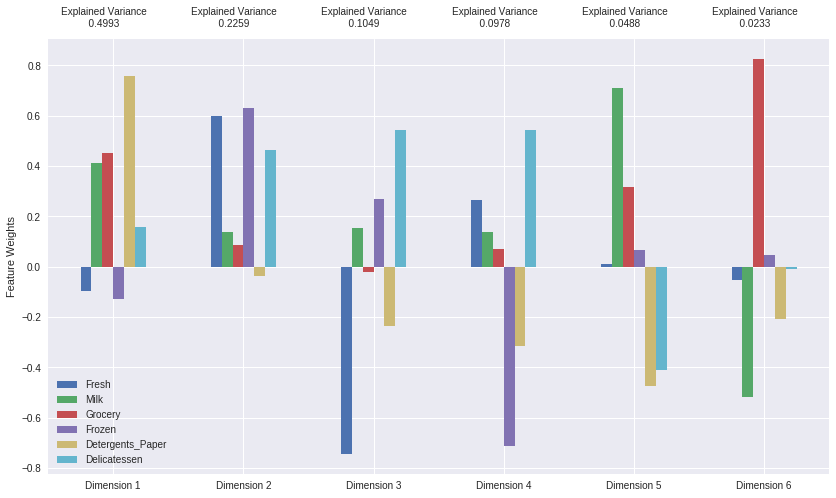

In [12]:
from sklearn.decomposition import PCA

import matplotlib.cm as cm
def pca_results(good_data, pca):
	'''
	Create a DataFrame of the PCA results
	Includes dimension feature weights and explained variance
	Visualizes the PCA results
	'''

	# Dimension indexing
	dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

	# PCA components
	components = pd.DataFrame(np.round(pca.components_, 4), columns = good_data.keys())
	components.index = dimensions

	# PCA explained variance
	ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
	variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
	variance_ratios.index = dimensions

	# Create a bar plot visualization
	fig, ax = plt.subplots(figsize = (14,8))

	# Plot the feature weights as a function of the components
	components.plot(ax = ax, kind = 'bar');
	ax.set_ylabel("Feature Weights")
	ax.set_xticklabels(dimensions, rotation=0)


	# Display the explained variance ratios
	for i, ev in enumerate(pca.explained_variance_ratio_):
		ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

	# Return a concatenated DataFrame
	return pd.concat([variance_ratios, components], axis = 1)

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6)
pca.fit(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

print("Original shape {} decreased to {}".format(log_samples.shape, pca_samples.shape))

# Generate PCA results plot
pca_results = pca_results(good_data, pca)
print "The cumulative explained variance is equal to:"
print pca_results['Explained Variance'].cumsum()
print ""

On the issue of flipped PCA Feature Weights on Dimension 3 and 4 : 

"Having a **flipped sign on all components doesn't make the result wron**g - the result is right as long as it fulfills the definition (each component is chosen such that it captures the **maximum amount of variance in the data**). As it stands, it seems the projection you got is simply mirrored - it still fulfills the definition, and is, thus, correct."

[source](https://stackoverflow.com/a/21116358/9466412)

PCA in a nutshell : "Finds new set of dimensions s.t. **all dimensions are orthogonal** (& linearly independent), and ranked according to variance of data along them. Important principle axis occurs first." [credit](https://medium.com/@aptrishu/understanding-principle-component-analysis-e32be0253ef0)

*   first 5 PC's usually explain 86% of variance
*   Explained variation = proportion to which mathematical model accounts for variation of given data set
*  Total variance = sum of variances of all individual PC's

Some basic steps : 

1.   Calculate covariance matrix X of datapoints
2.   Calculate eigenvectors & corresponding eigen values
3.   Sort eigen vectors according to eigen values, decreasingly
4.   Choose first k eigen vectors --> new k dimensions
5.   Transform original n dimensional data points --> k dimensions



### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**



*   By the first and second PC's, 72.5% of the data are explained. 
*   By the first four PC's, 92.8% of the data are explained. 

For each of these first components,


1.   First PC 
    * Pos : **Detergents_Paper,** **Grocery**, and **Milk**.
    * Neg :  Fresh, Frozen
2.   Second PC 
    * Pos : **Frozen**, **Fresh**, **Delicatessen**
    * Neg :  Detergents_Paper
3.   Third PC 
    * Pos : **Delicatessen**
    * Neg :  **Fresh**, Detergents_Paper
4.   Forth PC
    * Pos : **Delicatessen**, Fresh
    * Neg :  **Frozen**, Detergents_Paper



### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [13]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,0.4026,2.5486,-0.0626,-0.3826,-1.3865,0.0638
1,2.2877,2.0452,0.1012,0.6280,-0.3755,-0.0200
2,-0.9538,-4.0931,-1.6164,0.5626,0.5658,-0.0773


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [14]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)
print("Original shape {} decreased to {}".format(good_data.shape, reduced_data.shape))

# TODO: Transform the sample log-data using the PCA fit above
pca_samples=pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

Original shape (398, 6) decreased to (398, 2)


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [15]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,0.4026,2.5486
1,2.2877,2.0452
2,-0.9538,-4.0931


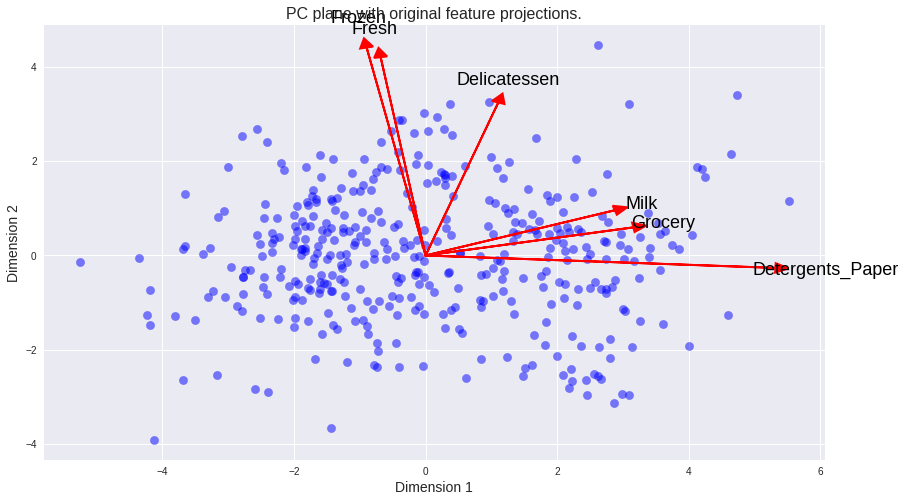

In [16]:
def biplot(good_data, reduced_data, pca):
    '''
    Produce a biplot that shows a scatterplot of the reduced
    data and the projections of the original features.
    
    good_data: original data, before transformation.
               Needs to be a pandas dataframe with valid column names
    reduced_data: the reduced data (the first two dimensions are plotted)
    pca: pca object that contains the components_ attribute
    return: a matplotlib AxesSubplot object (for any additional customization)
    
    This procedure is inspired by the script:
    https://github.com/teddyroland/python-biplot
    '''

    fig, ax = plt.subplots(figsize = (14,8))
    # scatterplot of the reduced data    
    ax.scatter(x=reduced_data.loc[:, 'Dimension 1'], y=reduced_data.loc[:, 'Dimension 2'], 
        facecolors='b', edgecolors='b', s=70, alpha=0.5)
    
    feature_vectors = pca.components_.T

    # we use scaling factors to make the arrows easier to see
    arrow_size, text_pos = 7.0, 8.0,

    # projections of the original features
    for i, v in enumerate(feature_vectors):
        ax.arrow(0, 0, arrow_size*v[0], arrow_size*v[1], 
                  head_width=0.2, head_length=0.2, linewidth=2, color='red')
        ax.text(v[0]*text_pos, v[1]*text_pos, good_data.columns[i], color='black', 
                 ha='center', va='center', fontsize=18)

    ax.set_xlabel("Dimension 1", fontsize=14)
    ax.set_ylabel("Dimension 2", fontsize=14)
    ax.set_title("PC plane with original feature projections.", fontsize=16);
    return ax
    
biplot(good_data, reduced_data, pca)

As can be seen,  milk, grocery, and detergents_paper are highly correlated. Delicatessen, is also an odd axis that does not correlated with other axes. This diagram roughly shows what was expected. 

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

GM = Gaussian Mixture

|         |  Pros |  Cons  | 
| :------------: | :-----------------: |:-----------------: |
| K-means | <ul> <li>Simple, fast</li><li>good for high dim data</li><li>can work with several dist measures</li></ul> | <ul><li>Time comp can be expensive</li><li>mean needs to be defined</li><li>sensitive to outliers</li><li>sensitive to internal centroids</li><li>can only make spherical clusters</li><li>**hard assignment**, may lead to misgrouping</li></ul> | 
| GM| <ul><li>doesn't assume clusters to be of geometry</li><li>works well with non-linear</li><li>Allows softer assignment than K-means</li></ul> | <ul><li>uses all components, so init of cluster difficult when dim high</li><li>Difficult to interpret</li></ul>| 


### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [27]:
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score 
#silhouette score = mean intra-cluster distance, nearest-cluster distance

slist = []
for n_clusters in range(2, 21):
  # TODO: Apply your clustering algorithm of choice to the reduced data 
  #print("reduced data has shape {}.".format(reduced_data.shape))
  clusterer = GMM(n_components=n_clusters).fit(reduced_data)

  # TODO: Predict the cluster for each data point
  preds = clusterer.predict(reduced_data)
  #print(preds.shape)
  #print(preds)

  centers = clusterer.means_

  # TODO: Predict the cluster for each transformed sample data point
  sample_preds = clusterer.predict(pca_samples)

  # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
  score = silhouette_score(reduced_data, preds)
  slist.append(score)
  print ("{} clusters : silhouette score is: {}".format(n_clusters, score))
  
  

2 clusters : silhouette score is: 0.443601474015
3 clusters : silhouette score is: 0.358151159705
4 clusters : silhouette score is: 0.291646368377
5 clusters : silhouette score is: 0.268764944818
6 clusters : silhouette score is: 0.307122866447
7 clusters : silhouette score is: 0.298799091887
8 clusters : silhouette score is: 0.294980417999
9 clusters : silhouette score is: 0.283717242517
10 clusters : silhouette score is: 0.295864211772
11 clusters : silhouette score is: 0.230913728487
12 clusters : silhouette score is: 0.206690423319
13 clusters : silhouette score is: 0.150654559775
14 clusters : silhouette score is: 0.124020130089
15 clusters : silhouette score is: 0.158280718125
16 clusters : silhouette score is: 0.175688001947
17 clusters : silhouette score is: 0.0871506672083
18 clusters : silhouette score is: 0.113607908274
19 clusters : silhouette score is: 0.112091869946
20 clusters : silhouette score is: 0.132182894697


In [0]:
#back to cluster number = 2
clusterer = GMM(n_components=2).fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.means_
sample_preds = clusterer.predict(pca_samples)
core = silhouette_score(reduced_data, preds)


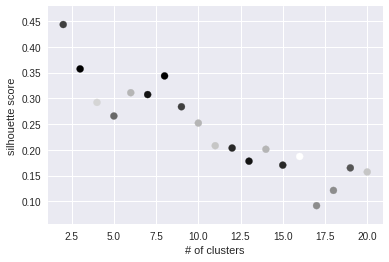

In [19]:
cp = {'a': np.arange(2, 21),
        'c': np.random.randint(0, 19, 19)}
cp['b'] = slist

plt.scatter('a', 'b', c='c', data=cp)
plt.xlabel('# of clusters')
plt.ylabel('silhouette score')
plt.show()

### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**




The best silhouette score was 2, which resulted in 0.444. The silhouette score has a decreasing trend after its peak on 0.444.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

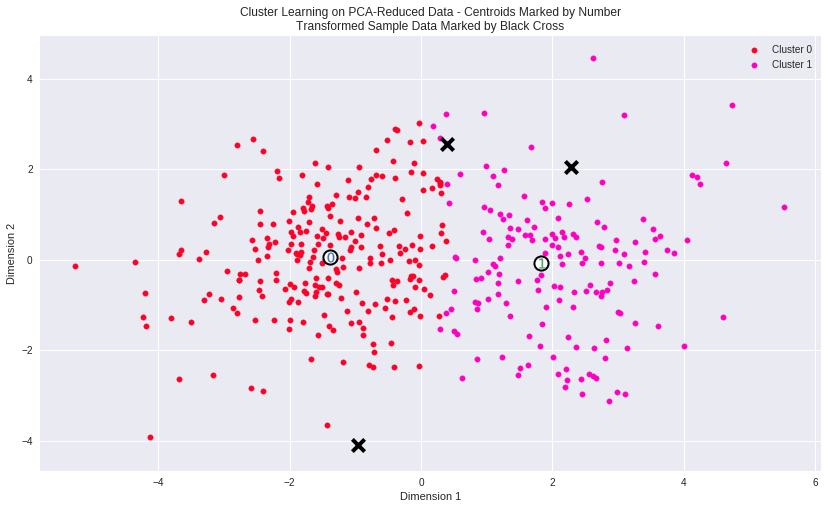

In [20]:
def cluster_results(reduced_data, preds, centers, pca_samples):
	'''
	Visualizes the PCA-reduced cluster data in two dimensions
	Adds cues for cluster centers and student-selected sample data
	'''

	predictions = pd.DataFrame(preds, columns = ['Cluster'])
	plot_data = pd.concat([predictions, reduced_data], axis = 1)

	# Generate the cluster plot
	fig, ax = plt.subplots(figsize = (14,8))

	# Color map
	cmap = cm.get_cmap('gist_rainbow')

	# Color the points based on assigned cluster
	for i, cluster in plot_data.groupby('Cluster'):   
	    cluster.plot(ax = ax, kind = 'scatter', x = 'Dimension 1', y = 'Dimension 2', \
	                 color = cmap((i)*1.0/(len(centers)-1)), label = 'Cluster %i'%(i), s=30);

	# Plot centers with indicators
	for i, c in enumerate(centers):
	    ax.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', \
	               alpha = 1, linewidth = 2, marker = 'o', s=200);
	    ax.scatter(x = c[0], y = c[1], marker='$%d$'%(i), alpha = 1, s=100);

	# Plot transformed sample points 
	ax.scatter(x = pca_samples[:,0], y = pca_samples[:,1], \
	           s = 150, linewidth = 4, color = 'black', marker = 'x');

	# Set plot title
	ax.set_title("Cluster Learning on PCA-Reduced Data - Centroids Marked by Number\nTransformed Sample Data Marked by Black Cross");

# Display the results of the clustering from implementation
cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [21]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8967.0,1920.0,2437.0,2081.0,309.0,741.0
Segment 1,6079.0,7042.0,10241.0,1275.0,3546.0,1159.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**



In segment 0, from the consumption of high **milk, grocery, detergents_paper, delicatessen** values, I would assume segment 0 to be a general **grocery store **or a **supermarket**. 

In segment 2, I would assume that as segment 1 only slightly exceeds segment 0 in categories **fresh, frozen** and not in other categories, I would assume it to be a **restaurant**. (Presumably not a coffee shop, unless it's for lactose-intolerant customers). 

Undeniably, the consumption level is a lot higher for segment 0 than segment 1 so I would guess it's a warehouse whereas segment 1 presumably treats customers. 


### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [29]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred
    

print("data statistics")
display(data.describe())    
print("samples")
display(samples)
print("true samples")
display(true_centers)

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1
data statistics


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


samples


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,31276,1917,4469,9408,2381,4334
1,22647,9776,13792,2915,4482,5778
2,2787,1698,2510,65,477,52


true samples


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8967.0,1920.0,2437.0,2081.0,309.0,741.0
Segment 1,6079.0,7042.0,10241.0,1275.0,3546.0,1159.0


**Answer:**

From the above results, sample points 0 and 1 are fit for cluster 0, whereas sample point 2 is fit for cluster 1. 

Looking back upon the initially picked samples, it is understandable how the clusters were chosen : on even a cursory look, sample points 0 and 1 is much greater in scale than sample point 2, more fit to be warehouses rather than small restaurants for customers.  Sample 2 is lower or near the 25% quartile for all 6 categories. 

## Conclusion

### Question 10
Companies often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether that change affects its customers positively or negatively. The wholesale distributor wants to consider changing its delivery service from 5 days a week to 3 days a week, but will only do so if it affects their customers positively. *How would you use the customer segments you found above to perform an A/B test for this change?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

I would test the customer segment 0 and 1 separately for testing their satisfaction on delivery services 5 days a week v. 3 days a week. This is because I assume that from their clearly differnet consumption patterns and following needs, the needed frequency of delivery services must also differ. As 3 days per week is the new option to be tested, I would announce to each groups of customers that the change would take place for a test period (1 month, but if protests are evident then stop in midway) then decide whether the change is beneficial considering customer satisfcation and budget cut. 

My hypothesis, however, is that segment 1 customers (restaurants) would need 5 days delivery per week, whereas segment 0 (warehouses) can survive on 3 days per week. I assume so because segment 1 may need fresher goods every day, whereas warehouse goods, dealt in bulk, need not be stocked every day.  


### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a segment it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and has made estimates for each customer's annual spending of the six product categories. Knowing these estimates, the wholesale distributor wants to classify each new customer to one of the customer segments to determine the most appropriate delivery service.  
*Describe a supervised learning strategy you could use to make classification predictions for the ten new customers.*  
**Hint:** What other input feature could the supervised learner use besides the six product features to help make a prediction?

**Answer:**

We can use the labelled segments as a target variable for training a new classification algorithm (SVM, decision tree, etc), and then categorize the new 10 customers. 

The additional input feature in the supervised learner besides the initial six feature, is the segment number of the already determined (via GMM) data.



### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

In [0]:
def channel_results(reduced_data, outliers, pca_samples):
	'''
	Visualizes the PCA-reduced cluster data in two dimensions using the full dataset
	Data is labeled by "Channel" and cues added for student-selected sample data
	'''

	# Check that the dataset is loadable
	try:
	    full_data = pd.read_csv("customers.csv")
	except:
	    print "Dataset could not be loaded. Is the file missing?"
	    return False

	# Create the Channel DataFrame
	channel = pd.DataFrame(full_data['Channel'], columns = ['Channel'])
	channel = channel.drop(channel.index[outliers]).reset_index(drop = True)
	labeled = pd.concat([reduced_data, channel], axis = 1)
	
	# Generate the cluster plot
	fig, ax = plt.subplots(figsize = (14,8))

	# Color map
	cmap = cm.get_cmap('gist_rainbow')

	# Color the points based on assigned Channel
	labels = ['Hotel/Restaurant/Cafe', 'Retailer']
	grouped = labeled.groupby('Channel')
	for i, channel in grouped:   
	    channel.plot(ax = ax, kind = 'scatter', x = 'Dimension 1', y = 'Dimension 2', \
	                 color = cmap((i-1)*1.0/2), label = labels[i-1], s=30);
	    
	# Plot transformed sample points   
	for i, sample in enumerate(pca_samples):
		ax.scatter(x = sample[0], y = sample[1], \
	           s = 200, linewidth = 3, color = 'black', marker = 'o', facecolors = 'none');
		ax.scatter(x = sample[0]+0.25, y = sample[1]+0.3, marker='$%d$'%(i), alpha = 1, s=125);

	# Set plot title
	ax.set_title("PCA-Reduced Data Labeled by 'Channel'\nTransformed Sample Data Circled");

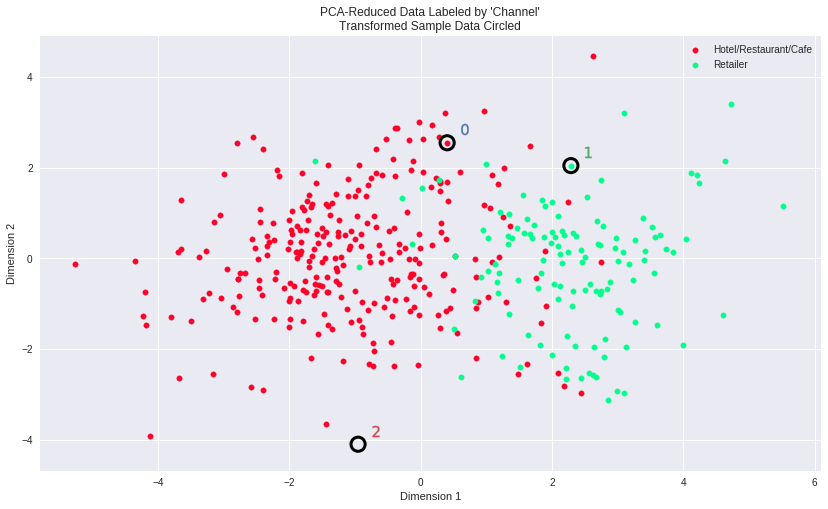

In [30]:
# Display the clustering results based on 'Channel' data
channel_results(reduced_data, out_list, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

The number of the clusters was correctly gussed, and 2 out of 3 samples were correctly estimated. (0 and 1 were assumed to be retails, whereas 2 was assumed to be hotel/restaurant/cafe). In the model shown, 0 was incorrectly guessed as a hotel/restaurant/cafe, but is mildly at the borderline of the two clusters. 


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.